## KMeans Implementation

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
n_samples = 300
data, classes = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.8)

In [3]:
%matplotlib inline

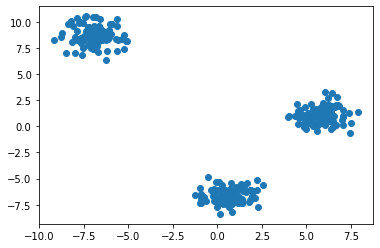

In [4]:
import matplotlib.pyplot as plt
import matplotlib 

plt.scatter(data[:, 0], data[:, 1])

In [5]:
from sklearn.base import ClusterMixin

class KMeans(ClusterMixin):
    """Simple KMeans implementation."""
    def __init__(self, k, n_iter=10):
        """
        Initialise the algorithm.
        
        Parameters
        ----------
        k : int
            number of clusters
        n_iter : int
            number of iterations of the convergence process
        """
        self.k = k
        self.n_iter = n_iter
    
    def fit_predict(self, X, y=None):
        """Performs clustering on X and returns cluster labels.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input data.

        y : Ignored
            not used, present for API consistency by convention.

        Returns
        -------
        labels : ndarray, shape (n_samples,)
            cluster labels
        centroids : ndarray, shape(k, n_features)
        """
        # Set initial centroids to random points in X
        centroids = X[np.random.choice(X.shape[0], size=self.k)]
        assignment = np.empty((X.shape[0],))
        for _ in range(self.n_iter):
            # Calculate euclidean distances
            # sqrt is not strictly necessary as the distance metric is
            # still directly proportional
            dist = np.array([
                np.sqrt(np.sum((X - c) ** 2, axis=1))
                for c in centroids])
            _assignment = np.argmin(dist, axis=0)

            if np.array_equal(_assignment, assignment):
                # algorithm has converged
                break
                
            assignment = _assignment
            # update step
            for k in range(len(centroids)):
                centroids[k] = np.mean(X[assignment == k], axis=0)
        return assignment, centroids

In [6]:
kmeans = KMeans(k=3, n_iter=10)
assignment, centroids = kmeans.fit_predict(data)

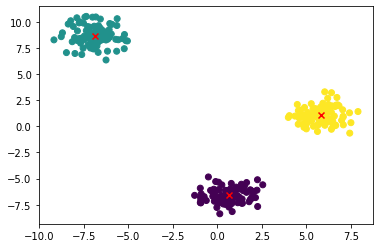

In [7]:
plt.scatter(data[:, 0], data[:, 1], c=assignment)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')